### Task 목표
환자의 갑상선 질환 클래스 분류 (Classification)

### 데이터 출처
kaggle
- https://www.kaggle.com/datasets/yasserhessein/thyroid-disease-data-set
- UC Irvine
https://archive.ics.uci.edu/dataset/102/thyroid+disease

### 데이터 설명
- 사용 파일: allhyper.data / allhyper.names / allhyper.test

#### Target classes
- Hyperthyroid: 갑상선 기능 항진증 / 갑상선 호르몬이 과다하게 분비되는 상태입니다.
- T3 toxic: T3 독성 / T3(삼요오드티로닌) 호르몬이 과다하게 분비되는 상태입니다.
- Goitre: 갑상선종 / 갑상선이 비대해진 상태입니다.
- Secondary toxic: 이차성 독성 / 이차적인 원인에 의한 갑상선 기능 항진증입니다.
- Negative: 정상 상태 / 이 범주에 속하지 않는 정상 상태입니다.

### 모델 설명
-  다중 분류에 특화 되어 있는 SoftMax Regression 사용


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  

#### Data 파일 전처리

In [2]:
# allHyperData 읽어 오기
allHyperData = pd.read_csv('../data/allhyper.data', header=None)
allHyperData = pd.DataFrame(allHyperData)
allHyperData

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,negative.|3733
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,negative.|1442
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,negative.|2965
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,negative.|806
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,negative.|2807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,70,M,f,f,f,f,f,f,f,f,...,t,155,t,1.05,t,148,f,?,SVI,negative.|3689
2796,73,M,f,t,f,f,f,f,f,f,...,t,63,t,0.88,t,72,f,?,other,negative.|3652
2797,75,M,f,f,f,f,f,f,f,f,...,t,147,t,0.8,t,183,f,?,other,negative.|1287
2798,60,F,f,f,f,f,f,f,f,f,...,t,100,t,0.83,t,121,f,?,other,negative.|3496


In [3]:
# allHyperData 헤더 읽어 오기
allhyperNames = pd.read_csv(
    "../names/allhyper.names",
    delimiter=":",
    comment=";",
    skiprows=[7, 8],
    header=None,
    skip_blank_lines=True,
)

columns = allhyperNames[0].tolist()

columns.append("classes")


In [4]:
# allHyperData 컬럼 헤더 설정
allHyperData.columns = columns

In [5]:
# 마지막 컬럼 분리 및 제거
allHyperData["classes"] = allHyperData["classes"].str.split(r"\.\|").str[0]
allHyperData.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,classes
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,negative
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,negative
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,negative
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,negative
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,negative


In [6]:
allHyperData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        2800 non-null   object
 1   sex                        2800 non-null   object
 2   on thyroxine               2800 non-null   object
 3   query on thyroxine         2800 non-null   object
 4   on antithyroid medication  2800 non-null   object
 5   sick                       2800 non-null   object
 6   pregnant                   2800 non-null   object
 7   thyroid surgery            2800 non-null   object
 8   I131 treatment             2800 non-null   object
 9   query hypothyroid          2800 non-null   object
 10  query hyperthyroid         2800 non-null   object
 11  lithium                    2800 non-null   object
 12  goitre                     2800 non-null   object
 13  tumor                      2800 non-null   object
 14  hypopitu

In [7]:
# 안 쓰는 컬럼 제거
allHyperData = allHyperData.drop(columns=["TBG measured", "TBG"])

allHyperData = allHyperData.drop(
    columns=[
        "TSH measured",
        "T3 measured",
        "TT4 measured",
        "T4U measured",
        "FTI measured",
        "referral source",
    ]
)

In [8]:
# 컬럼의 데이터 타입 변경 (object -> int)
for col in allHyperData[["age", "TSH", "T3", "TT4", "T4U", "FTI"]]:
    if allHyperData[col].dtype == "object":
        allHyperData[col] = pd.to_numeric(allHyperData[col], errors="coerce")

In [9]:
allHyperData

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,classes
0,41.0,F,f,f,f,f,f,f,f,f,...,f,f,f,f,1.30,2.5,125.0,1.14,109.0,negative
1,23.0,F,f,f,f,f,f,f,f,f,...,f,f,f,f,4.10,2.0,102.0,NaN,NaN,negative
2,46.0,M,f,f,f,f,f,f,f,f,...,f,f,f,f,0.98,NaN,109.0,0.91,120.0,negative
3,70.0,F,t,f,f,f,f,f,f,f,...,f,f,f,f,0.16,1.9,175.0,NaN,NaN,negative
4,70.0,F,f,f,f,f,f,f,f,f,...,f,f,f,f,0.72,1.2,61.0,0.87,70.0,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,70.0,M,f,f,f,f,f,f,f,f,...,f,f,f,f,2.70,NaN,155.0,1.05,148.0,negative
2796,73.0,M,f,t,f,f,f,f,f,f,...,f,f,f,f,NaN,0.7,63.0,0.88,72.0,negative
2797,75.0,M,f,f,f,f,f,f,f,f,...,f,f,f,f,NaN,NaN,147.0,0.80,183.0,negative
2798,60.0,F,f,f,f,f,f,f,f,f,...,f,f,f,f,1.40,NaN,100.0,0.83,121.0,negative


In [10]:
allHyperData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        2799 non-null   float64
 1   sex                        2800 non-null   object 
 2   on thyroxine               2800 non-null   object 
 3   query on thyroxine         2800 non-null   object 
 4   on antithyroid medication  2800 non-null   object 
 5   sick                       2800 non-null   object 
 6   pregnant                   2800 non-null   object 
 7   thyroid surgery            2800 non-null   object 
 8   I131 treatment             2800 non-null   object 
 9   query hypothyroid          2800 non-null   object 
 10  query hyperthyroid         2800 non-null   object 
 11  lithium                    2800 non-null   object 
 12  goitre                     2800 non-null   object 
 13  tumor                      2800 non-null   objec

In [11]:
# one-hot encoding
mapping = {"t": 1, "f": 0}

allHyperData = allHyperData.map(lambda x: mapping.get(x, x))

In [12]:
allHyperData.loc[:, allHyperData.columns != "sex"] = allHyperData.loc[
    :, allHyperData.columns != "sex"
].replace("?", pd.NA)

In [13]:
allHyperData.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        2799 non-null   float64
 1   sex                        2800 non-null   object 
 2   on thyroxine               2800 non-null   int64  
 3   query on thyroxine         2800 non-null   int64  
 4   on antithyroid medication  2800 non-null   int64  
 5   sick                       2800 non-null   int64  
 6   pregnant                   2800 non-null   int64  
 7   thyroid surgery            2800 non-null   int64  
 8   I131 treatment             2800 non-null   int64  
 9   query hypothyroid          2800 non-null   int64  
 10  query hyperthyroid         2800 non-null   int64  
 11  lithium                    2800 non-null   int64  
 12  goitre                     2800 non-null   int64  
 13  tumor                      2800 non-null   int64

In [14]:
# 결측값 확인하기
allHyperData.isna().sum()

age                            1
sex                            0
on thyroxine                   0
query on thyroxine             0
on antithyroid medication      0
sick                           0
pregnant                       0
thyroid surgery                0
I131 treatment                 0
query hypothyroid              0
query hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH                          284
T3                           585
TT4                          184
T4U                          297
FTI                          295
classes                        0
dtype: int64

In [15]:
# 결측값이 있는 컬럼의 평균값 구하기
missing_columns = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']

mean_values = allHyperData[missing_columns].mean().round(2)
print(mean_values)

age     51.84
TSH      4.67
T3       2.02
TT4    109.07
T4U      1.00
FTI    110.79
dtype: float64


In [16]:
# 결측값 평균값으로 대체 하기
allHyperData[missing_columns] = allHyperData[missing_columns].fillna(mean_values)

In [17]:
allHyperData.isna().sum()

age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH                          0
T3                           0
TT4                          0
T4U                          0
FTI                          0
classes                      0
dtype: int64

In [18]:
allHyperData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        2800 non-null   float64
 1   sex                        2800 non-null   object 
 2   on thyroxine               2800 non-null   int64  
 3   query on thyroxine         2800 non-null   int64  
 4   on antithyroid medication  2800 non-null   int64  
 5   sick                       2800 non-null   int64  
 6   pregnant                   2800 non-null   int64  
 7   thyroid surgery            2800 non-null   int64  
 8   I131 treatment             2800 non-null   int64  
 9   query hypothyroid          2800 non-null   int64  
 10  query hyperthyroid         2800 non-null   int64  
 11  lithium                    2800 non-null   int64  
 12  goitre                     2800 non-null   int64  
 13  tumor                      2800 non-null   int64

In [19]:
allHyperData["age"] = allHyperData["age"].astype(int)

allHyperData.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,classes
0,41,F,0,0,0,0,0,0,0,0,...,0,0,0,0,1.30,2.50,125.0,1.14,109.00,negative
1,23,F,0,0,0,0,0,0,0,0,...,0,0,0,0,4.10,2.00,102.0,1.00,110.79,negative
2,46,M,0,0,0,0,0,0,0,0,...,0,0,0,0,0.98,2.02,109.0,0.91,120.00,negative
3,70,F,1,0,0,0,0,0,0,0,...,0,0,0,0,0.16,1.90,175.0,1.00,110.79,negative
4,70,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0.72,1.20,61.0,0.87,70.00,negative


In [20]:
allHyperData_encoded = pd.get_dummies(
    allHyperData,
    columns=["sex"],
    dtype=int,
)

allHyperData_encoded.head()

,age,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,...,psych,TSH,T3,TT4,T4U,FTI,classes,sex_?,sex_F,sex_M
0,41,0,0,0,0,0,0,0,0,0,...,0,1.30,2.50,125.0,1.14,109.00,negative,0,1,0
1,23,0,0,0,0,0,0,0,0,0,...,0,4.10,2.00,102.0,1.00,110.79,negative,0,1,0
2,46,0,0,0,0,0,0,0,0,0,...,0,0.98,2.02,109.0,0.91,120.00,negative,0,0,1
3,70,1,0,0,0,0,0,0,0,0,...,0,0.16,1.90,175.0,1.00,110.79,negative,0,1,0
4,70,0,0,0,0,0,0,0,0,0,...,0,0.72,1.20,61.0,0.87,70.00,negative,0,1,0


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

### Test 파일 전처리 (Data 파일과 동일)

In [22]:
allHyperTest = pd.read_csv("../test/allhyper.test", header=None)

In [23]:
allHyperTest.columns = columns

In [24]:
allHyperTest["classes"] = allHyperTest["classes"].str.split(r"\.\|").str[0]

In [25]:
allHyperTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 972 entries, 0 to 971
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        972 non-null    int64 
 1   sex                        972 non-null    object
 2   on thyroxine               972 non-null    object
 3   query on thyroxine         972 non-null    object
 4   on antithyroid medication  972 non-null    object
 5   sick                       972 non-null    object
 6   pregnant                   972 non-null    object
 7   thyroid surgery            972 non-null    object
 8   I131 treatment             972 non-null    object
 9   query hypothyroid          972 non-null    object
 10  query hyperthyroid         972 non-null    object
 11  lithium                    972 non-null    object
 12  goitre                     972 non-null    object
 13  tumor                      972 non-null    object
 14  hypopituit

In [26]:
allHyperTest = allHyperTest.drop(columns=["TBG measured", "TBG"])

allHyperTest = allHyperTest.drop(
    columns=[
        "TSH measured",
        "T3 measured",
        "TT4 measured",
        "T4U measured",
        "FTI measured",
        "referral source",
    ]
)

allHyperTest.describe(include="all")

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,classes
count,972.000000,972,972,972,972,972,972,972,972,972,...,972,972,972,972,972,972,972,972,972,972
unique,NaN,3,2,2,2,2,2,2,2,2,...,2,2,1,2,204,55,174,110,162,5
top,NaN,F,f,f,f,f,f,f,f,f,...,f,f,f,f,?,?,?,?,?,negative
freq,NaN,650,838,962,963,935,960,958,961,901,...,963,947,972,923,85,184,47,90,90,947
mean,51.423868,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,18.966700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,7.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,35.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,54.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,67.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
for col in allHyperTest[["age", "TSH", "T3", "TT4", "T4U", "FTI"]]:
    if allHyperTest[col].dtype == "object":
        allHyperTest[col] = pd.to_numeric(allHyperTest[col], errors="coerce")

In [28]:
mapping = {"t": 1, "f": 0}

allHyperTest = allHyperTest.map(lambda x: mapping.get(x, x))

In [29]:
allHyperTest

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,classes
0,35,F,0,0,0,0,0,0,0,0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,negative
1,63,M,0,0,0,0,0,0,0,0,...,0,0,0,0,3.50,2.5,108.0,0.96,113.0,negative
2,25,F,0,0,0,0,0,0,0,0,...,0,0,0,0,4.60,2.4,61.0,0.82,75.0,negative
3,53,F,0,0,0,0,0,0,0,1,...,0,0,0,0,0.25,2.1,145.0,1.03,141.0,negative
4,92,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0.70,1.3,120.0,0.84,143.0,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967,30,F,0,0,0,0,0,0,0,0,...,0,1,0,0,NaN,NaN,NaN,NaN,NaN,negative
968,68,F,0,0,0,0,0,0,0,0,...,0,0,0,0,1.00,2.1,124.0,1.08,114.0,negative
969,74,F,0,0,0,0,0,0,0,0,...,0,0,0,0,5.10,1.8,112.0,1.07,105.0,negative
970,72,M,0,0,0,0,0,0,0,0,...,0,0,0,0,0.70,2.0,82.0,0.94,87.0,negative


In [30]:
allHyperTest.isna().sum()

age                            0
sex                            0
on thyroxine                   0
query on thyroxine             0
on antithyroid medication      0
sick                           0
pregnant                       0
thyroid surgery                0
I131 treatment                 0
query hypothyroid              0
query hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH                           85
T3                           184
TT4                           47
T4U                           90
FTI                           90
classes                        0
dtype: int64

In [31]:
missing_columns = ['TSH', 'T3', 'TT4', 'T4U', 'FTI']

mean_values = allHyperTest[missing_columns].mean().round(2)

In [32]:
allHyperTest[missing_columns] = allHyperTest[missing_columns].fillna(mean_values)

In [33]:
allHyperTest.isna().sum()

age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH                          0
T3                           0
TT4                          0
T4U                          0
FTI                          0
classes                      0
dtype: int64

In [34]:
allHyperTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 972 entries, 0 to 971
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        972 non-null    int64  
 1   sex                        972 non-null    object 
 2   on thyroxine               972 non-null    int64  
 3   query on thyroxine         972 non-null    int64  
 4   on antithyroid medication  972 non-null    int64  
 5   sick                       972 non-null    int64  
 6   pregnant                   972 non-null    int64  
 7   thyroid surgery            972 non-null    int64  
 8   I131 treatment             972 non-null    int64  
 9   query hypothyroid          972 non-null    int64  
 10  query hyperthyroid         972 non-null    int64  
 11  lithium                    972 non-null    int64  
 12  goitre                     972 non-null    int64  
 13  tumor                      972 non-null    int64  

In [35]:
allHyperTest_encoded = pd.get_dummies(
    allHyperTest,
    columns=["sex"],
    dtype=int,
)

allHyperTest_encoded.head()

,age,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,...,psych,TSH,T3,TT4,T4U,FTI,classes,sex_?,sex_F,sex_M
0,35,0,0,0,0,0,0,0,0,0,...,0,6.26,1.98,106.19,0.99,109.57,negative,0,1,0
1,63,0,0,0,0,0,0,0,0,0,...,0,3.50,2.50,108.00,0.96,113.00,negative,0,0,1
2,25,0,0,0,0,0,0,0,0,0,...,0,4.60,2.40,61.00,0.82,75.00,negative,0,1,0
3,53,0,0,0,0,0,0,0,1,0,...,0,0.25,2.10,145.00,1.03,141.00,negative,0,1,0
4,92,0,0,0,0,0,0,0,0,0,...,0,0.70,1.30,120.00,0.84,143.00,negative,0,1,0


In [36]:
allHyperTest_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 972 entries, 0 to 971
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        972 non-null    int64  
 1   on thyroxine               972 non-null    int64  
 2   query on thyroxine         972 non-null    int64  
 3   on antithyroid medication  972 non-null    int64  
 4   sick                       972 non-null    int64  
 5   pregnant                   972 non-null    int64  
 6   thyroid surgery            972 non-null    int64  
 7   I131 treatment             972 non-null    int64  
 8   query hypothyroid          972 non-null    int64  
 9   query hyperthyroid         972 non-null    int64  
 10  lithium                    972 non-null    int64  
 11  goitre                     972 non-null    int64  
 12  tumor                      972 non-null    int64  
 13  hypopituitary              972 non-null    int64  

### 모델 생성

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [38]:
# 중복을 허용하지 않고, 있는 데이터의 모든 종류를 출력
print("class 종류:", allHyperData_encoded["classes"].unique(), sep="\n")
print("class 종류:", allHyperTest_encoded["classes"].unique(), sep="\n")

class 종류:
['negative' 'hyperthyroid' 'T3 toxic' 'goitre']
class 종류:
['negative' 'hyperthyroid' 'T3 toxic' 'secondary toxic' 'goitre']


In [39]:
# secondary toxic 이상치 삭제
allHyperTest_encoded['classes'].value_counts()

classes
negative           947
hyperthyroid        17
goitre               5
T3 toxic             2
secondary toxic      1
Name: count, dtype: int64

In [40]:
allHyperTest_encoded = allHyperTest_encoded.loc[\
  allHyperTest_encoded['classes'] != 'secondary toxic'\
    ]

allHyperTest_encoded['classes'].value_counts()

classes
negative        947
hyperthyroid     17
goitre            5
T3 toxic          2
Name: count, dtype: int64

In [41]:
# train set feature와 target 분리
feature_train = allHyperData_encoded[['sick', 'pregnant', 'lithium', 'goitre', 'tumor']]
feature_target = allHyperData_encoded['classes']

In [42]:
scaler = StandardScaler()
label_encoder = LabelEncoder()

# train set feature 표준화
x_train = scaler.fit_transform(feature_train)

# train set target 표준화
y_train = label_encoder.fit_transform(feature_target)


In [43]:
# test set feature와 target 분리
feature_test = allHyperTest_encoded[['sick', 'pregnant', 'lithium', 'goitre', 'tumor']]
target_test = allHyperTest_encoded['classes']

In [44]:
# test set feature 표준화
x_test = scaler.fit_transform(feature_test)

# train set target 표준화
y_test = label_encoder.fit_transform(target_test)


In [45]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)


(2800, 5) (2800,)
(971, 5) (971,)


### 모델 훈련

In [46]:
# Train a Softmax Regression model
# 매개변수: solver='lbfgs', max_iter=500
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500)
logreg= model.fit(x_train, y_train)

In [47]:
# 분석결과 출력
print("prediction:", logreg.predict(x_test))
print("Train Data score : ", round(logreg.score(x_train,y_train),3))
print("Test Data score: ", round(logreg.score(x_test, y_test),3))

prediction: [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 

In [48]:
# Train a Softmax Regression model
# solver='lbfgs', max_iter=1000
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
logreg = model.fit(x_train, y_train)

# 분석결과 출력
print("prediction:", logreg.predict(x_test))
print("Train Data score : ", round(logreg.score(x_train,y_train),3))
print("Test Data score: ", round(logreg.score(x_test, y_test),3))

prediction: [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 

In [52]:
from sklearn.model_selection import learning_curve
import numpy as np

# Train a Softmax Regression model 
# 매개변수: solver='newton-cg', max_iter=1000
model = LogisticRegression(multi_class='multinomial', solver='newton-cg', max_iter=1000, penalty='l2')
logreg = model.fit(x_train, y_train)
y_pred = logreg.predict(x_test)

# Record learning curve
train_sizes, train_scores, test_scores = learning_curve(model, x_train, y_train, cv=5, n_jobs=-1, 
                                                        train_sizes=np.linspace(0.1, 1.0, 10), 
                                                        scoring='accuracy')

print("prediction:", logreg.predict(x_test))
print("Train Data score : ", round(logreg.score(x_train,y_train),3))
print("Test Data score: ", round(logreg.score(x_test, y_test),3))

prediction: [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 

In [ ]:
# Evaluate the model
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_, zero_division=1)
print(report)

# 지표 설명
# precision: 모델이 양성으로 예측한 샘플 중 실제 양성 샘플의 비율
# recall: 특정 클래스의 실제 양성 샘플 중 모델이 올바르게 양성으로 예측한 비율
# f1-score: Precision(정밀도)과 Recall(재현율)의 조화 평균

# 결과 분석
# negative 값을 제외한 나머지 class에 대해서는 제대로 분류 하지 못하고 있다
# 이는 negative 값이 절대적으로 많은 데이터 불균형에 의해 발생한 문제로 보임
# 소수 class에 대한 가중치 부여가 필요

              precision    recall  f1-score   support

    T3 toxic       1.00      0.00      0.00         2
      goitre       1.00      0.60      0.75         5
hyperthyroid       1.00      0.00      0.00        17
    negative       0.98      1.00      0.99       947

    accuracy                           0.98       971
   macro avg       0.99      0.40      0.43       971
weighted avg       0.98      0.98      0.97       971



In [ ]:
# Train a Softmax Regression model (소수 class 가중치 부여)
# 매개변수: solver='newton-cg', max_iter=500, penalty='l2', class_weight='balanced'
model = LogisticRegression(multi_class='multinomial', solver='newton-cg', max_iter=500, penalty='l2', class_weight='balanced')
logreg = model.fit(x_train, y_train)
y_pred = logreg.predict(x_test)

# 분석결과 출력
print("prediction:", logreg.predict(x_test))
print("Train Data score : ", round(logreg.score(x_train,y_train),3))
print("Test Data score: ", round(logreg.score(x_test, y_test),3))

prediction: [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 1 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 0 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0
 3 3 3 3 2 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3 3 3 3 3 3 3
 3 3 3 3 3 3 2 3 1 3 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3 3 3 3 3 3 3
 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 0 3 3 3 0 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3 3 3 3 0 3 3 3
 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 1 3 3 0 3 3 3 3 3 3
 3 3 3 3 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 

In [ ]:
# Evaluate the model
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_, zero_division=1)
print(report)

              precision    recall  f1-score   support

    T3 toxic       1.00      0.00      0.00         2
      goitre       1.00      0.60      0.75         5
hyperthyroid       1.00      0.00      0.00        17
    negative       0.98      1.00      0.99       947

    accuracy                           0.98       971
   macro avg       0.99      0.40      0.43       971
weighted avg       0.98      0.98      0.97       971



In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)

<Figure size 1000x1000 with 0 Axes>

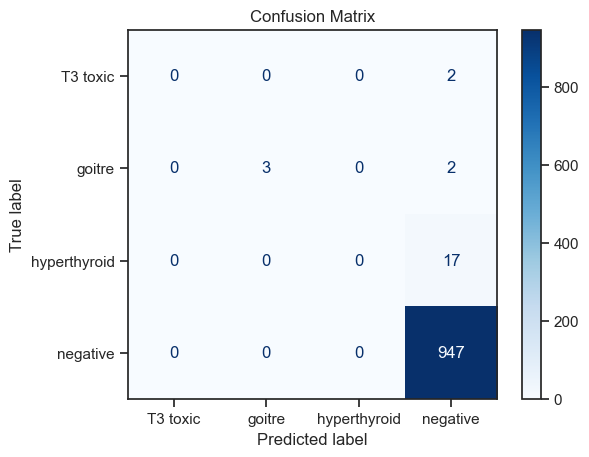

In [ ]:
# Plot confusion matrix
plt.figure(figsize=(10, 10))
cmd.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import numpy as np

# 과적합 여부 검증 
# Calculate mean and standard deviation for training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

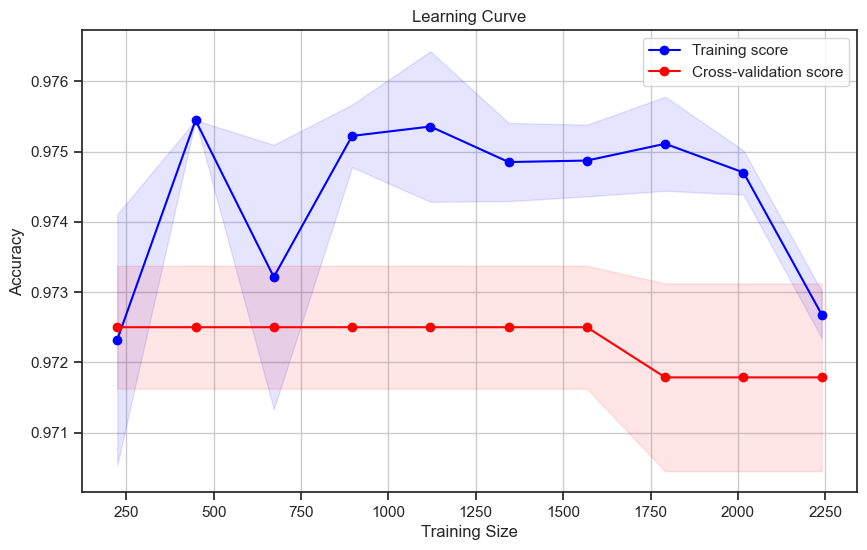

In [ ]:
# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training score')
plt.plot(train_sizes, test_mean, 'o-', color='red', label='Cross-validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='red')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.grid()
plt.show()

# 지표 설명
# Traning score (훈련 정확도): train set의 모델 학습도
# Cross-validation score (검증 정확도): test set의 모델 학습도

# 결과 분석
# 훈련 정확도는 0.975, 검증 정확도는 0.972 근처에서 변동
# 훈련 정확도와 검증 정확도의 차이가 크지 않음 => 과적합 되지 않음


### 종합 평가
- 모델의 정확도 (accuracy)는 98%로 높은 성능 유지
- 'negative' 클래스에 대해 높은 정확도와 재현율을 가지지만, 나머지 'T3 toxic', 'goitre', 'hyperthyroid' 클래스에 대한 성능이 매우 낮음
- 이는 데이터 불균형으로 인한 소수 클래스에 대한 성능 저하로 보임
  - 따라서 `class_weight='balanced` 매개변수를 추가 시도
  - 그러나 모델 성능은 더 저하. 왜?
  - 데이터 불균형 심각. 데이터의 대표성 떨어짐.
- 개선 방안
  - 오버샘플링(SMOTE) 또는 언더샘플링: 소수 클래스의 샘플 추가 또는 다수 클래스 샘플 무작위 삭제

### 프로젝트 평가
- 도메인에 대한 이해 부족으로 적합하게 데이터 전처리를 수행 여부에 대한 아쉬움
- 여러 요인으로 인해 갑상선 질환 종류 및 여부가 판단 -> 비선형적 데이터..? -> 랜덤포레스트로 분석을 해봤으면 어땠을까 하는 생각